In [1]:
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate, PolyGate
import numpy as np
from scipy.stats import norm
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
from scipy.signal import savgol_filter
import scipy.optimize as opt

warnings.filterwarnings('ignore')





In [2]:
loc="/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/"


In [3]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007


In [4]:
bud4=pd.read_csv('eEMC007_4.csv')

In [5]:
time=np.arange(0,1612,4)/60
#Series
series1=np.log(savgol_filter(bud4['D1'], 31, 1))
series2=np.log(savgol_filter(bud4['D2'], 31, 1))
series3=np.log(savgol_filter(bud4['D4'], 31, 1))
series4=np.log(savgol_filter(bud4['D11'], 31, 1))
#Slopes
slope1=np.gradient(savgol_filter(bud4['D1'], 31, 1),np.arange(0,1612,4)/60)
slope2=np.gradient(savgol_filter(bud4['D2'], 31, 1),np.arange(0,1612,4)/60)
slope3=np.gradient(savgol_filter(bud4['D4'], 31, 1),np.arange(0,1612,4)/60)
slope4=np.gradient(savgol_filter(bud4['D11'], 31, 1),np.arange(0,1612,4)/60)
#Max slope
max_slope1=np.max(slope1)
max_slope2=np.max(slope2)
max_slope3=np.max(slope3)
max_slope4=np.max(slope4)
#Max Slope location
loc1=np.where(slope1==np.max(slope1))[0][0]
loc2=np.where(slope2==np.max(slope2))[0][0]
loc3=np.where(slope3==np.max(slope3))[0][0]
loc4=np.where(slope4==np.max(slope4))[0][0]

In [6]:
t=np.arange(1,20,1)
line1=series1[loc1]+max_slope1*(t-time[loc1])
line2=series2[loc2]+max_slope2*(t-time[loc2])
line3=series3[loc3]+max_slope3*(t-time[loc3])
line4=series4[loc4]+max_slope4*(t-time[loc4])

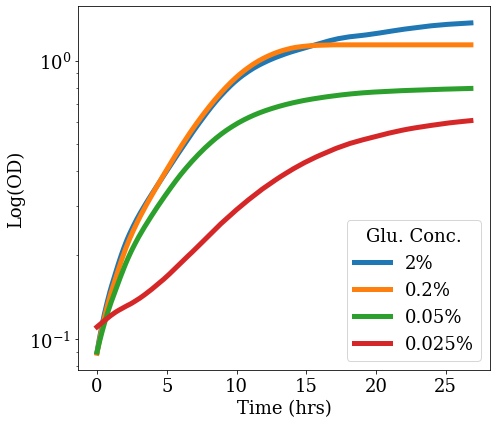

In [9]:
plt.rc('font',family='serif')
plt.figure(figsize=(7,6))
plt.plot(np.arange(0,1612,4)/60,savgol_filter(bud4['D1'], 31, 1),linewidth=5)
plt.plot(np.arange(0,1612,4)/60,savgol_filter(bud4['D2'], 31, 1),linewidth=5)
plt.plot(np.arange(0,1612,4)/60,savgol_filter(bud4['D4'], 31, 1),linewidth=5)
plt.plot(np.arange(0,1612,4)/60,savgol_filter(bud4['D11'], 31, 1),linewidth=5)

# plt.plot(t,line1,'--',color='black')
# plt.plot(t,line2,'--',color='black')
# plt.plot(t,line3,'--',color='black')
# plt.plot(t,line4,'--',color='black')

plt.legend(['2%','0.2%','0.05%','0.025%'],fontsize=18,title='Glu. Conc.',title_fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time (hrs)',fontsize=18)
plt.ylabel('Log(OD)',fontsize=18)
plt.yscale('log')
plt.tight_layout()

# plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/GrowthRateBUD4Glucose.jpg',dpi=600)

In [22]:
slope1=np.gradient(series3,np.arange(0,1612,4)/60)

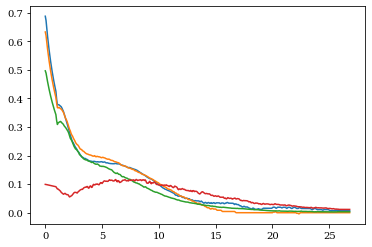

In [25]:
plt.plot(np.arange(0,1612,4)/60,np.gradient(series1,np.arange(0,1612,4)/60))
plt.plot(np.arange(0,1612,4)/60,np.gradient(series2,np.arange(0,1612,4)/60))
plt.plot(np.arange(0,1612,4)/60,np.gradient(series3,np.arange(0,1612,4)/60))
plt.plot(np.arange(0,1612,4)/60,np.gradient(series4,np.arange(0,1612,4)/60))

In [26]:
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate, PolyGate
import numpy as np
from scipy.stats import norm
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
from scipy.signal import savgol_filter
import scipy.optimize as opt

warnings.filterwarnings('ignore')





In [27]:
loc="/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/"


In [28]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007


In [29]:
cts1=pd.read_csv('eEMC013_growth_curves_cts1_no_beta_beta_2_005_0025.txt',sep='\t')

## No beta-estradiol

In [30]:
time=np.arange(0,241,1)/10
#Series
series1=np.log(savgol_filter(cts1['D3'], 31, 1))
series2=np.log(savgol_filter(cts1['D4'], 31, 1))
series3=np.log(savgol_filter(cts1['D5'], 31, 1))

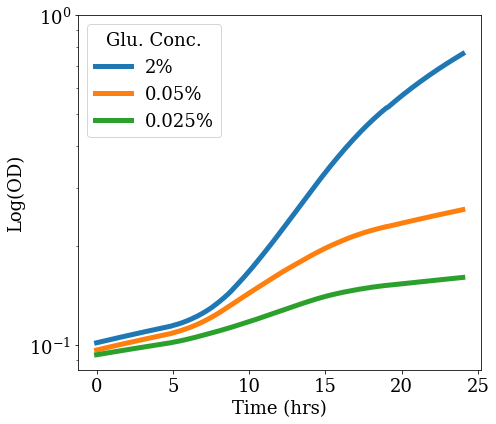

In [31]:
s=0
plt.rc('font',family='serif')
plt.figure(figsize=(7,6))
plt.plot(np.arange(s,241,1)/10,savgol_filter(cts1['D3'], 100, 1)[s:],linewidth=5)
plt.plot(np.arange(s,241,1)/10,savgol_filter(cts1['D4'], 100, 1)[s:],linewidth=5)
plt.plot(np.arange(s,241,1)/10,savgol_filter(cts1['D5'], 100, 1)[s:],linewidth=5)
plt.yscale('log')
plt.legend(['2%','0.05%','0.025%'],fontsize=18,title='Glu. Conc.',title_fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time (hrs)',fontsize=18)
plt.ylabel('Log(OD)',fontsize=18)
plt.ylim(0,1)
plt.tight_layout()

plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/GrowthRateCTS1_No_beta_Glucose.jpg',dpi=600)

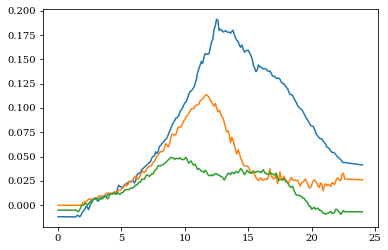

In [36]:
plt.plot(np.arange(s,241,1)/10,np.gradient(series1,np.arange(s,241,1)/10))
plt.plot(np.arange(s,241,1)/10,np.gradient(series2,np.arange(s,241,1)/10))
plt.plot(np.arange(s,241,1)/10,np.gradient(series3,np.arange(s,241,1)/10))


## Beta-estradiol

In [37]:
time=np.arange(0,241,1)/10
#Series
series1=np.log(savgol_filter(cts1['D7'], 31, 1))
series2=np.log(savgol_filter(cts1['D8'], 31, 1))
series3=np.log(savgol_filter(cts1['D9'], 31, 1))

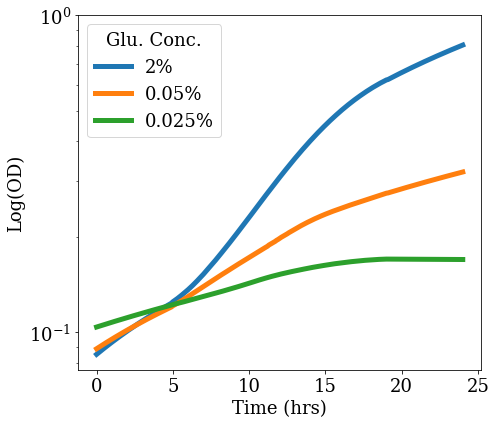

In [38]:
s=0
plt.rc('font',family='serif')
plt.figure(figsize=(7,6))
plt.plot(np.arange(s,241,1)/10,savgol_filter(cts1['D7'], 100, 1)[s:],linewidth=5)
plt.plot(np.arange(s,241,1)/10,savgol_filter(cts1['D8'], 100, 1)[s:],linewidth=5)
plt.plot(np.arange(s,241,1)/10,savgol_filter(cts1['D9'], 100, 1)[s:],linewidth=5)
plt.yscale('log')
plt.legend(['2%','0.05%','0.025%'],fontsize=18,title='Glu. Conc.',title_fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time (hrs)',fontsize=18)
plt.ylabel('Log(OD)',fontsize=18)
plt.ylim(0,1)
plt.tight_layout()

plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/GrowthRateCTS1_beta_Glucose.jpg',dpi=600)

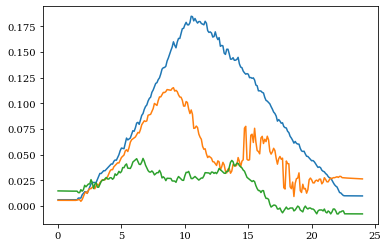

In [39]:
plt.plot(np.arange(s,241,1)/10,np.gradient(series1,np.arange(s,241,1)/10))
plt.plot(np.arange(s,241,1)/10,np.gradient(series2,np.arange(s,241,1)/10))
plt.plot(np.arange(s,241,1)/10,np.gradient(series3,np.arange(s,241,1)/10))